In [4]:
# import basic packages for data processing 
import pandas as pd 
pd.set_option("Display.max.column",None)
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [5]:
data=pd.read_csv("loan_data.csv")

In [6]:
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [33]:
new_cols = []
for col in data.columns:
    new_cols.append(col.strip())   # remove spaces
data.columns = new_cols

In [34]:
data.columns

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')

In [8]:
# total records and features in dataset 
print("Total records in dataset:",data.shape[0])
print("Total features in dataset:",data.shape[1])

Total records in dataset: 4269
Total features in dataset: 13


In [9]:
# drop irrelavent features 
data.drop(["loan_id"],axis=1,inplace=True)

In [10]:
# remaining features after dropping irrealavent features
data.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [11]:
data.describe()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [12]:
# checking unique values in data 
unique_value={col:data[col].unique() for col in data.columns}
unique_value

{' no_of_dependents': array([2, 0, 3, 5, 4, 1], dtype=int64),
 ' education': array([' Graduate', ' Not Graduate'], dtype=object),
 ' self_employed': array([' No', ' Yes'], dtype=object),
 ' income_annum': array([9600000, 4100000, 9100000, 8200000, 9800000, 4800000, 8700000,
        5700000,  800000, 1100000, 2900000, 6700000, 5000000, 1900000,
        4700000,  500000, 2700000, 6300000, 5800000, 6500000, 4900000,
        3100000, 2400000, 7000000, 9000000, 8400000, 1700000, 1600000,
        8000000, 3600000, 1500000, 7800000, 1400000, 4200000, 5500000,
        9500000, 7300000, 3800000, 5100000, 4300000, 9300000, 7400000,
        8500000, 8800000, 3300000, 3900000, 8300000, 5600000, 5300000,
        2600000,  700000, 3500000, 9900000, 3000000, 6800000, 2000000,
        1000000,  300000, 6600000, 9400000, 4400000,  400000, 6200000,
        9700000, 7100000,  600000, 7200000,  900000,  200000, 1800000,
        4600000, 2200000, 2500000, 8600000, 4000000, 5200000, 8900000,
        1300000

In [13]:
# checking for null values in data 
data.isnull().sum()

no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [14]:
# checking for duplicates values in data 
data.duplicated().sum()

0

<Axes: >

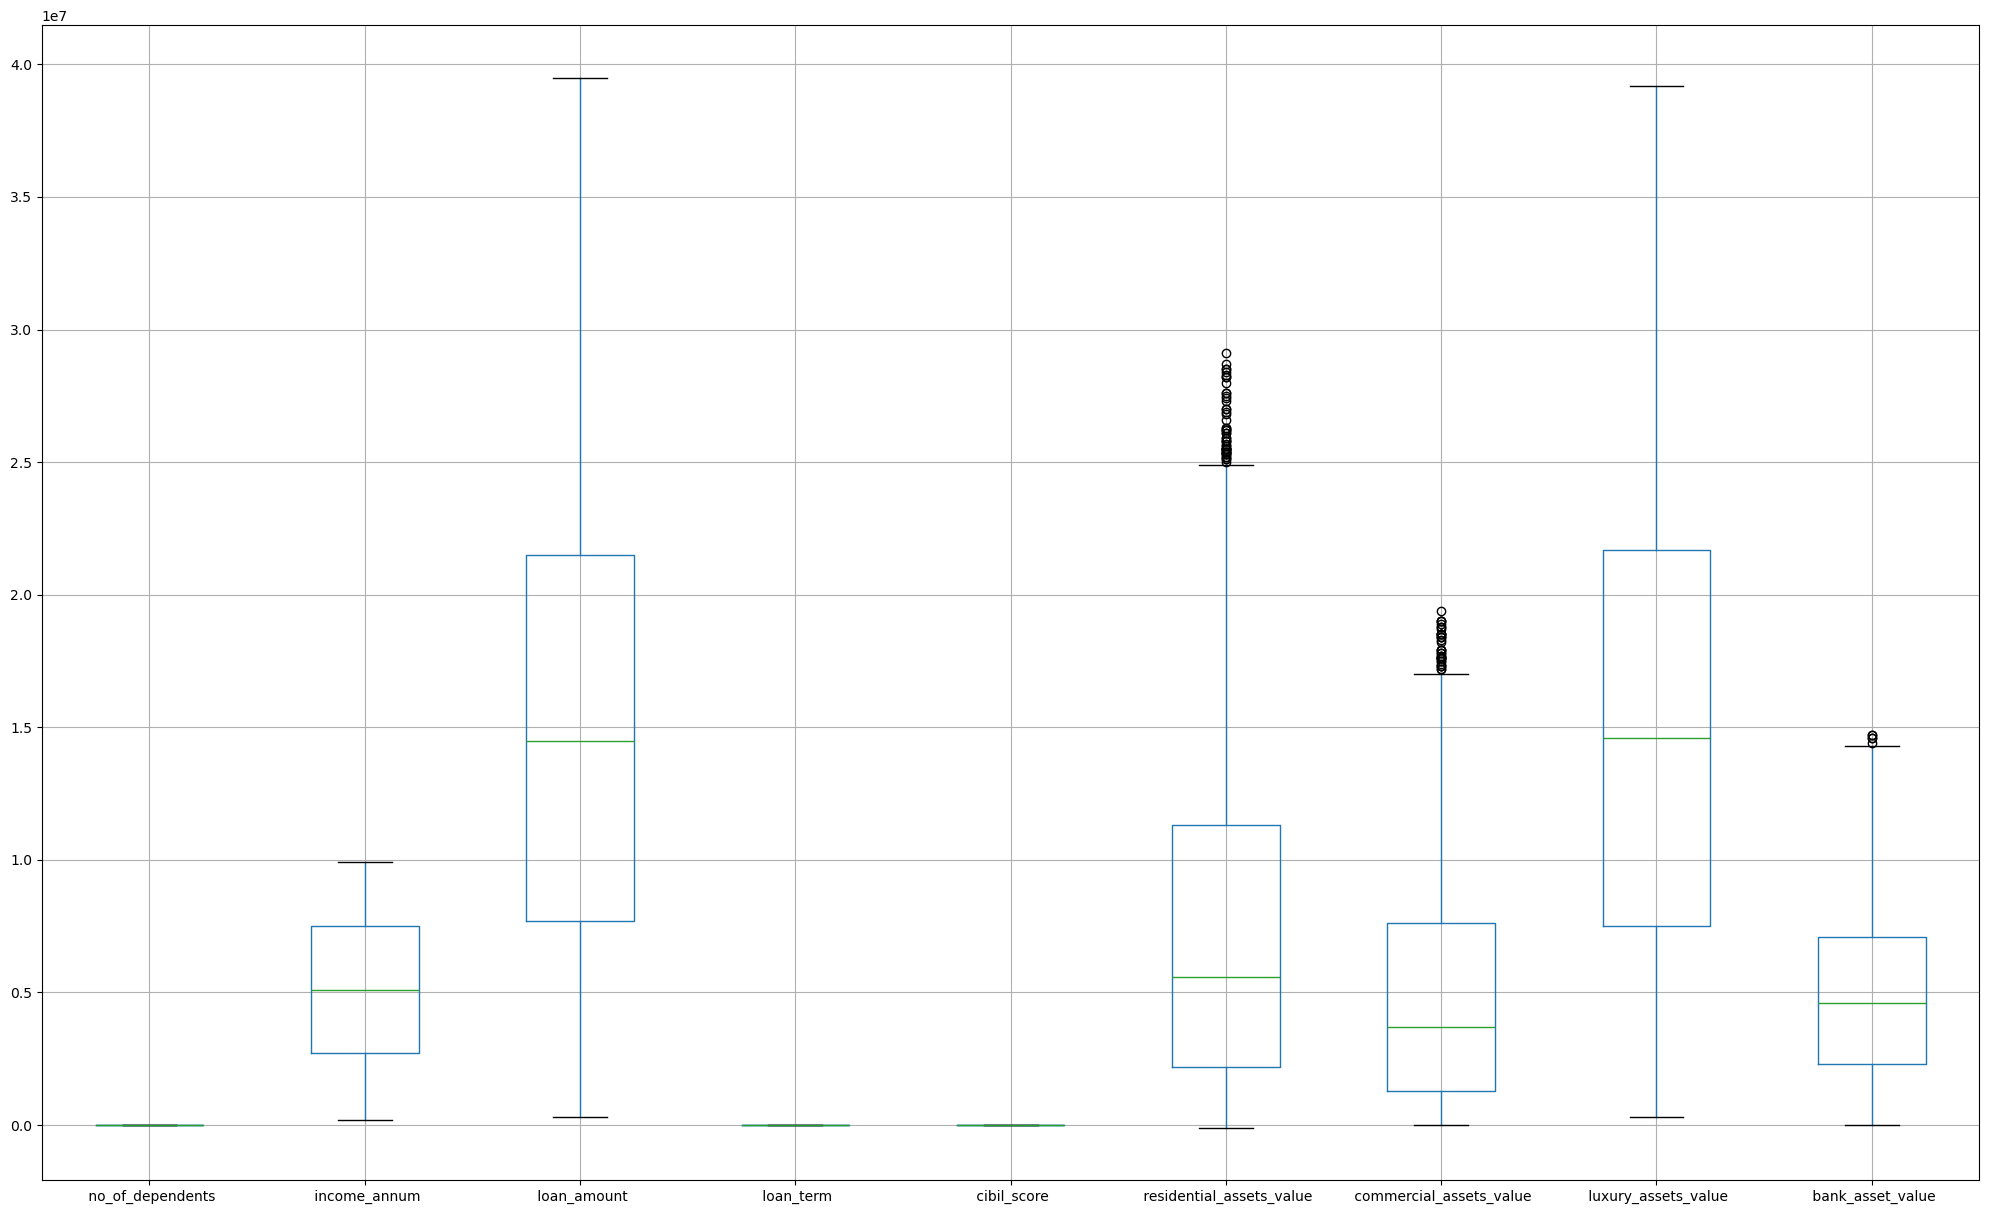

In [15]:
plt.figure(figsize=(25,15))
data.boxplot()

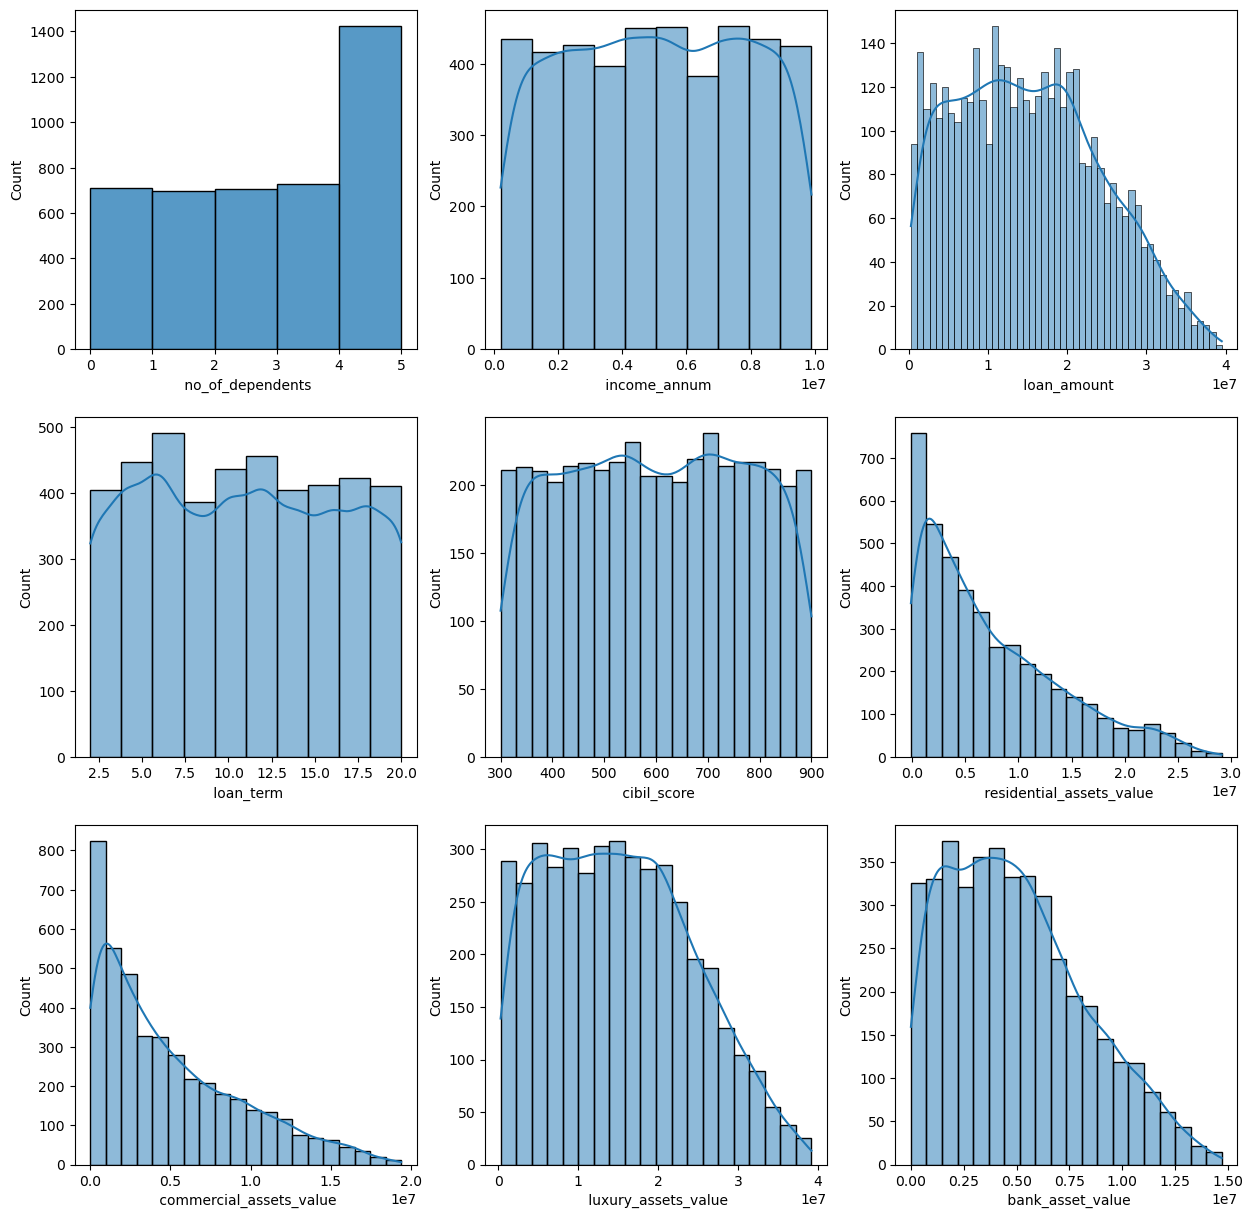

In [ ]:
plt.figure(figsize=(15,15))
plt.subplot(3,3,1)
sns.histplot(data[ "no_of_dependents"],bins=5)
plt.subplot(3,3,2)
sns.histplot(data[ "income_annum"],bins=10,kde=True)
plt.subplot(3,3,3)
sns.histplot(data[ "loan_amount"],bins=50,kde=True)
plt.subplot(3,3,4)
sns.histplot(data[ "loan_term"],bins=10,kde=True)
plt.subplot(3,3,5)
sns.histplot(data[ "cibil_score"],bins=20,kde=True)
plt.subplot(3,3,6)
sns.histplot(data[ "residential_assets_value"],bins=20,kde=True)
plt.subplot(3,3,7)
sns.histplot(data[ "commercial_assets_value"],bins=20,kde=True)
plt.subplot(3,3,8)
sns.histplot(data[ "luxury_assets_value"],bins=20,kde=True)
plt.subplot(3,3,9)
sns.histplot(data[ "bank_asset_value"],bins=20,kde=True)
plt.show()

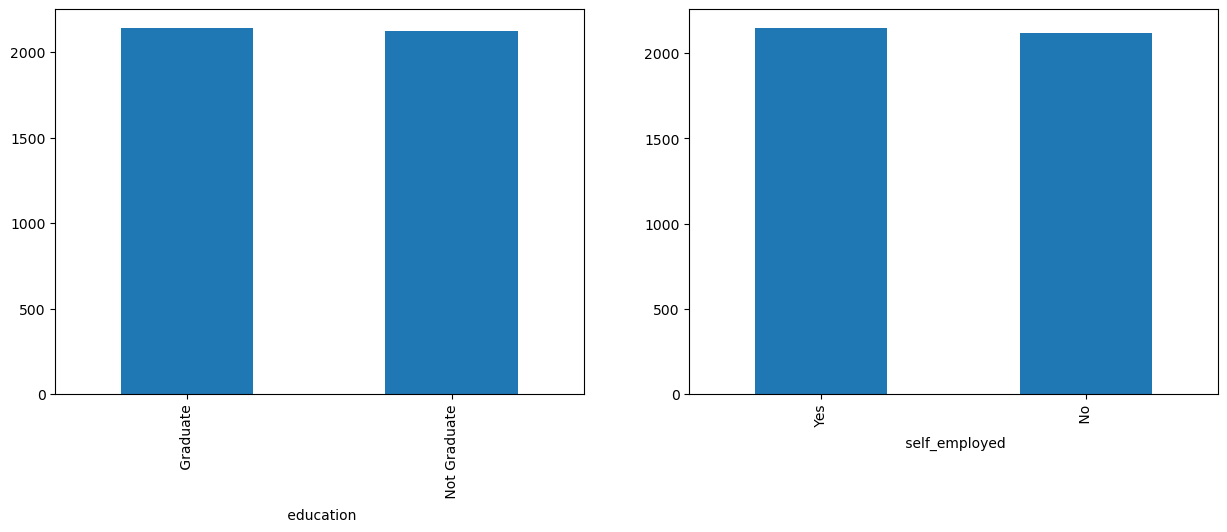

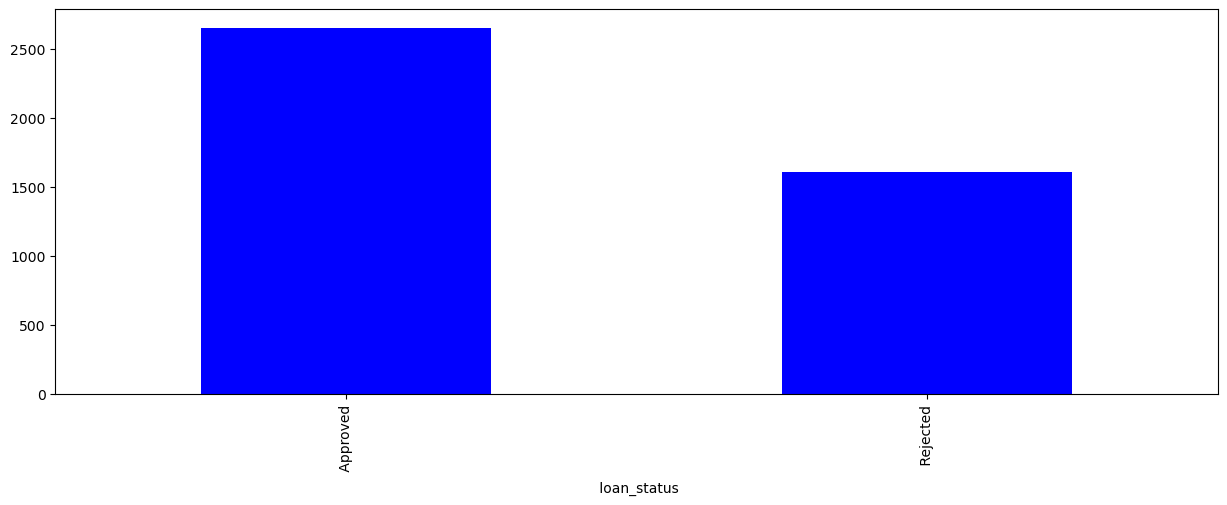

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
data["education"].value_counts().plot(kind="bar")
plt.subplot(1,2,2)
data["self_employed"].value_counts().plot(kind="bar")
plt.show()
plt.figure(figsize=(15,5))
data["loan_status"].value_counts().plot(kind="bar",color="b")
plt.show()

In [ ]:
data["loan_status"].value_counts()

 loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

encode_education=LabelEncoder()
encode_self_employed=LabelEncoder()
encode_loan_status=LabelEncoder()

data["education"]=encode_education.fit_transform(data["education"])
data["self_employed"]=encode_self_employed.fit_transform(data["self_employed"])
data["loan_status"]=encode_loan_status.fit_transform(data["loan_status"])

data.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


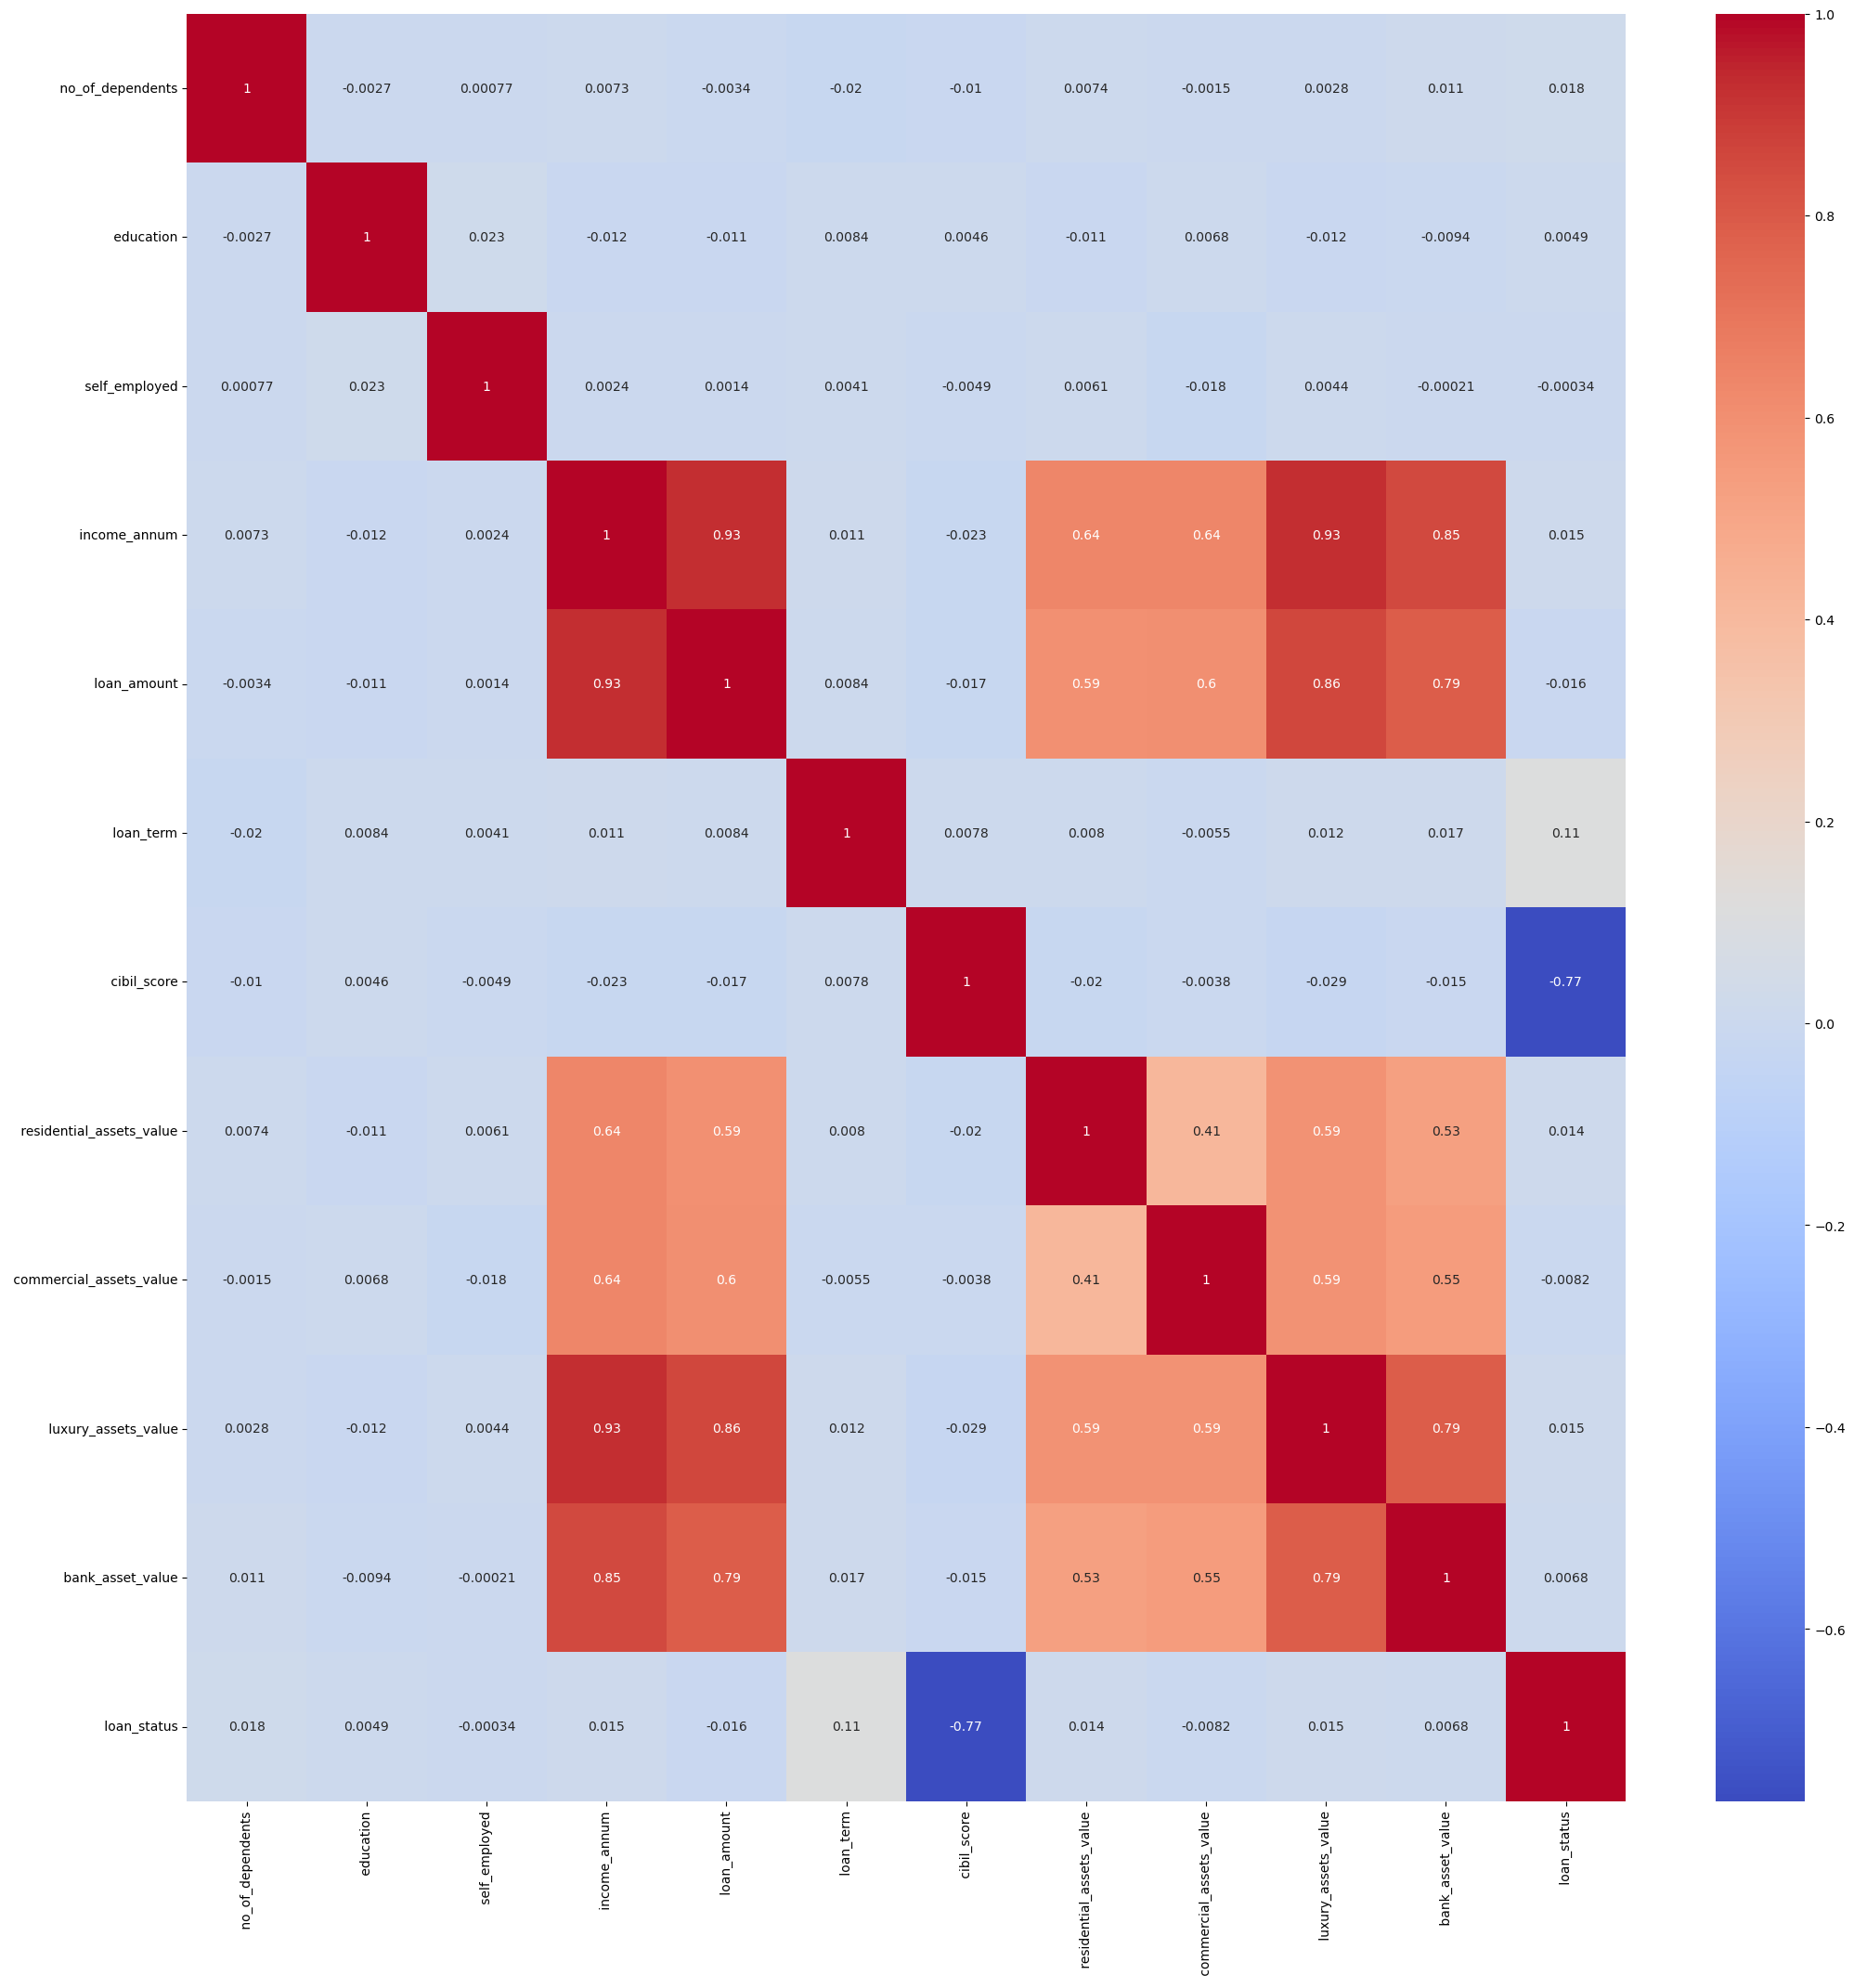

In [20]:
corr=data.corr()
plt.figure(figsize=(25,25))
sns.heatmap(corr,annot=True,cmap="coolwarm")
plt.show()

In [ ]:
x=data.drop(["loan_status"],axis=1)
y=data["loan_status"]

In [22]:
from sklearn.model_selection import train_test_split 
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=42)

In [23]:
train_y.value_counts()

 loan_status
0    2120
1    1295
Name: count, dtype: int64

In [24]:
from imblearn.over_sampling import SMOTE
sampling=SMOTE()

sampled_train_x,sampled_train_y=sampling.fit_resample(train_x,train_y)

In [25]:
sampled_train_y.value_counts()

 loan_status
0    2120
1    2120
Name: count, dtype: int64

In [26]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()

scale_train_x=scale.fit_transform(sampled_train_x)
scale_test_x=scale.transform(test_x)

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.ensemble import GradientBoostingClassifier 
from xgboost import XGBClassifier 
from sklearn.svm import SVC

In [28]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,roc_auc_score

In [29]:
def get_metrics(actual,predicted):
    acc=accuracy_score(actual,predicted)
    cf=confusion_matrix(actual,predicted)
    pr=precision_score(actual,predicted)
    rc=recall_score(actual,predicted)
    f1=f1_score(actual,predicted)
    roc=roc_auc_score(actual,predicted)
    return acc,cf,pr,rc,f1,roc

In [30]:
models={
    "LogisticRegression":LogisticRegression(),
    "DecisionTreeClassifier":DecisionTreeClassifier(),
    "RandomForestClassifier":RandomForestClassifier(),
    "AdaBoostClassifier":AdaBoostClassifier(),
    "GradientBoostingClassifier":GradientBoostingClassifier(),
    "XGBClassifier":XGBClassifier(),
    "SVC":SVC(kernel="linear")
}

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(scale_train_x,sampled_train_y)

    train_pred=model.predict(scale_train_x)
    test_pred=model.predict(scale_test_x)

    train_acc,train_cf,train_pr,train_rc,train_f1,train_roc=get_metrics(sampled_train_y,train_pred)
    test_acc,test_cf,test_pr,test_rc,test_f1,test_roc=get_metrics(test_y,test_pred)

    print(list(models.keys())[i])
    print("*"*30)
    print("Training data:")
    print("-"*30)
    print("accuracy score:",train_acc)
    print("confusion matrix:\n",train_cf)
    print("precision score:",train_pr)
    print("recall score:",train_rc)
    print("f1-score:",train_f1)
    print("roc auc score:",train_roc)
    print("-"*60)
    print("Training data:")
    print("-"*30)
    print("accuracy score:",test_acc)
    print("confusion matrix:\n",test_cf)
    print("precision score:",test_pr)
    print("recall score:",test_rc)
    print("f1-score:",test_f1)
    print("roc auc score:",test_roc)
    print("="*60)
    print("\n")


LogisticRegression
******************************
Training data:
------------------------------
accuracy score: 0.9337264150943396
confusion matrix:
 [[1951  169]
 [ 112 2008]]
precision score: 0.9223702342673403
recall score: 0.9471698113207547
f1-score: 0.9346055387479637
roc auc score: 0.9337264150943396
------------------------------------------------------------
Training data:
------------------------------
accuracy score: 0.9098360655737705
confusion matrix:
 [[489  47]
 [ 30 288]]
precision score: 0.8597014925373134
recall score: 0.9056603773584906
f1-score: 0.8820826952526799
roc auc score: 0.9089869050971557


DecisionTreeClassifier
******************************
Training data:
------------------------------
accuracy score: 1.0
confusion matrix:
 [[2120    0]
 [   0 2120]]
precision score: 1.0
recall score: 1.0
f1-score: 1.0
roc auc score: 1.0
------------------------------------------------------------
Training data:
------------------------------
accuracy score: 0.9754098360

In [31]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
cv=StratifiedKFold()

In [32]:
rf=RandomForestClassifier()

n_estimators_rf=[int(x) for x in np.linspace(start=10,stop=100,num=5)]
max_depth_rf=[int(x) for x in np.linspace(start=3,stop=50,num=3)]
min_samples_split_rf=[2,3,4]
min_samples_leaf_rf=[2,3,5]
max_samples_rf=[1000,2000,3000]

params_rf=dict(n_estimators=n_estimators_rf,max_depth=max_depth_rf,min_samples_split=min_samples_split_rf,min_samples_leaf=min_samples_leaf_rf,max_samples=max_samples_rf)

rf_tun=RandomizedSearchCV(estimator=rf,param_distributions=params_rf,n_iter=10,cv=cv,n_jobs=-1,verbose=3)

rf_tun.fit(scale_train_x,sampled_train_y)

train_pred=rf_tun.predict(scale_train_x)
test_pred=rf_tun.predict(scale_test_x)

train_acc,train_cf,train_pr,train_rc,train_f1,train_roc=get_metrics(sampled_train_y,train_pred)
test_acc,test_cf,test_pr,test_rc,test_f1,test_roc=get_metrics(test_y,test_pred)

print("*"*30)
print("Training data:")
print("-"*30)
print("accuracy score:",train_acc)
print("confusion matrix:\n",train_cf)
print("precision score:",train_pr)
print("recall score:",train_rc)
print("f1-score:",train_f1)
print("roc auc score:",train_roc)
print("-"*60)
print("Training data:")
print("-"*30)
print("accuracy score:",test_acc)
print("confusion matrix:\n",test_cf)
print("precision score:",test_pr)
print("recall score:",test_rc)
print("f1-score:",test_f1)
print("roc auc score:",test_roc)
print("="*60)
print("\n")

print(rf_tun.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
******************************
Training data:
------------------------------
accuracy score: 0.994811320754717
confusion matrix:
 [[2118    2]
 [  20 2100]]
precision score: 0.9990485252140818
recall score: 0.9905660377358491
f1-score: 0.994789199431549
roc auc score: 0.9948113207547169
------------------------------------------------------------
Training data:
------------------------------
accuracy score: 0.977751756440281
confusion matrix:
 [[528   8]
 [ 11 307]]
precision score: 0.9746031746031746
recall score: 0.9654088050314465
f1-score: 0.9699842022116903
roc auc score: 0.975241715948559


{'n_estimators': 100, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_samples': 3000, 'max_depth': 50}
